## Linear Filtering

Text(0.5, 1.0, 'Median Filter for 50% S&P Noise')

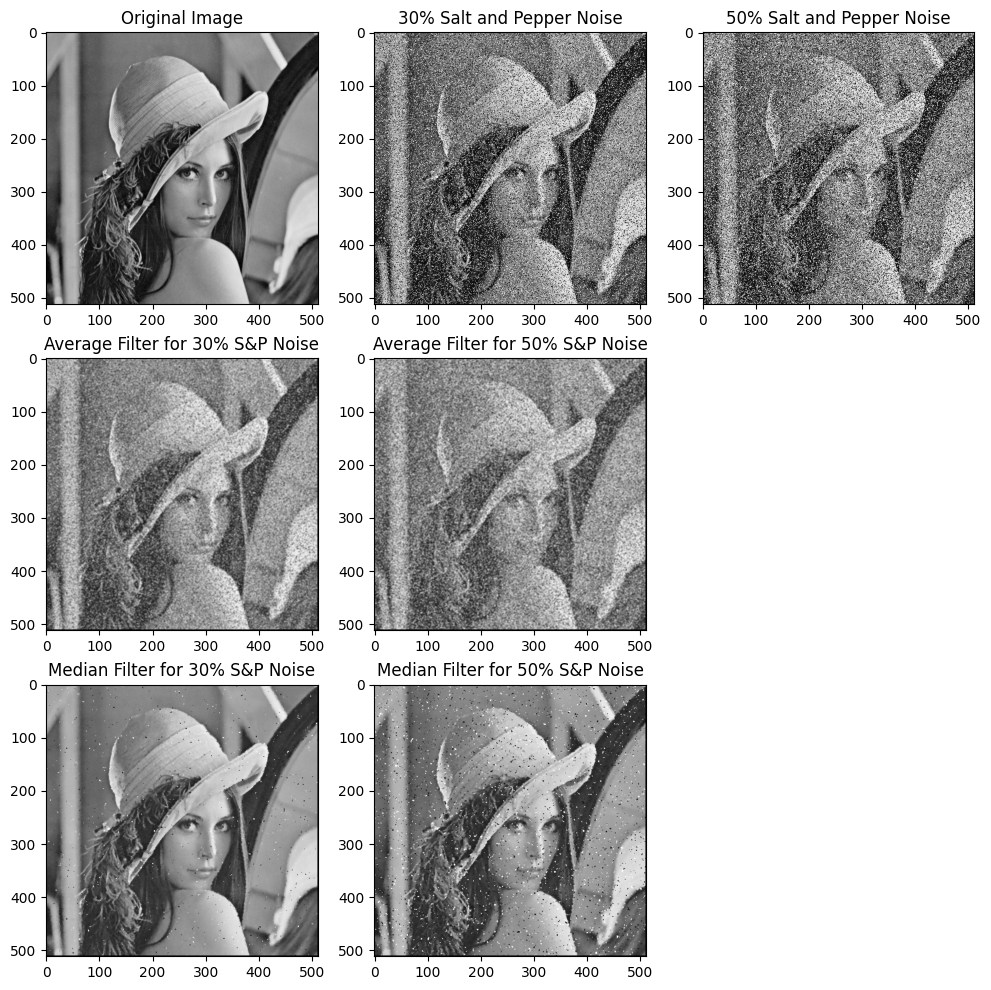

In [ ]:
#linear filtering
#apply salt and pepper noise of the certain percentage and apply a linear filter to it

import cv2
import numpy as np
from matplotlib import pyplot as plt

fig=plt.figure(figsize=(12,12))

image1=cv2.imread('/content/drive/MyDrive/Colab Notebooks/Standard Images/lena_color_512.tif')
image1=cv2.cvtColor(image1,cv2.COLOR_BGR2RGB)
image1=cv2.cvtColor(image1,cv2.COLOR_RGB2GRAY)

#adding salt and pepper noise
def salt_and_pepper_noise(image, percentage):
  size=image.size
  #setting the noise size, with percentage * size
  noise_size=int(percentage * size)
  #selecting indices for adding noise
  random_indices=np.random.choice(size,noise_size)
  noisy_image=image.copy()
  noise=np.random.choice([image.min(),image.max()], noise_size)
  noisy_image.flat[random_indices]=noise
  return noisy_image

#adding averaging filter
def averaging_filter(image1):
  mask=np.ones((3,3),dtype=int)#mask
  mask=mask/9
  image_avg=np.ones((image1.shape[0],image1.shape[1]))
  for i in range(1,image1.shape[0]-1):
    for j in range(1,image1.shape[1]-1):
      temp = (image1[i-1, j-1]*mask[0, 0]+
              image1[i-1, j]*mask[0, 1]+
              image1[i-1, j + 1]*mask[0, 2]+
              image1[i, j-1]*mask[1, 0]+
              image1[i, j]*mask[1, 1]+
              image1[i, j + 1]*mask[1, 2]+
              image1[i + 1, j-1]*mask[2, 0]+
              image1[i + 1, j]*mask[2, 1]+
              image1[i + 1, j + 1]*mask[2, 2])
      image_avg[i,j]=temp
  image_avg=image_avg.astype(np.uint8)
  return image_avg

#adding median filter
def median_filter(image1):
  m,n=image1.shape
  median=np.zeros([m,n])

  for i in range(1,m-1):
    for j in range(1,n-1):
      temp=[image1[i-1,j-1],
            image1[i-1,j],
            image1[i-1,j+1],
            image1[i,j-1],
            image1[i,j],
            image1[i,j+1],
            image1[i+1,j-1],
            image1[i+1,j],
            image1[i+1,j+1]]
      temp=sorted(temp)
      median[i,j]=temp[4]
  median=median.astype(np.uint8)
  return median


#30%,50% salt and pepper noise
noisy_image1=salt_and_pepper_noise(image1,0.3)
noisy_image2=salt_and_pepper_noise(image1,0.5)
#adding averaging filter
image_avg1=averaging_filter(noisy_image1)
image_avg2=averaging_filter(noisy_image2)
#adding median filter
median1=median_filter(noisy_image1)
median2=median_filter(noisy_image2)

#adding subplots
fig.add_subplot(331)
plt.imshow(image1,cmap="gray")
plt.title("Original Image")

fig.add_subplot(332)
plt.imshow(noisy_image1,cmap="gray")
plt.title("30% Salt and Pepper Noise")

fig.add_subplot(333)
plt.imshow(noisy_image2,cmap="gray")
plt.title("50% Salt and Pepper Noise")

fig.add_subplot(334)
plt.imshow(image_avg1,cmap="gray")
plt.title("Average Filter for 30% S&P Noise")

fig.add_subplot(335)
plt.imshow(image_avg2,cmap="gray")
plt.title("Average Filter for 50% S&P Noise")

fig.add_subplot(337)
plt.imshow(median1,cmap="gray")
plt.title("Median Filter for 30% S&P Noise")

fig.add_subplot(338)
plt.imshow(median2,cmap="gray")
plt.title("Median Filter for 50% S&P Noise")

In [ ]:
import numpy as np

def psnr(image1,image2):
  #getting the sifference between the 2 images
  difference=np.subtract(image1,image2)
  squared_difference=np.square(difference)

  #mean squared error
  mean_squared_error=np.mean(squared_difference)
  max=255 #maximum pixel
  peak_signal_to_noise_ratio= 10 * np.log10(max**2 / mean_squared_error)
  print("Peak Signal To Noise Ratio:",peak_signal_to_noise_ratio)

print("PSNR for 30% Noisy Image after Median FIlter:")
psnr(image1,median1)
print("PSNR for 50% Noisy Image after Median FIlter:")
psnr(image1,median2)

PSNR for 30% Noisy Image after Median FIlter:
Peak Signal To Noise Ratio: 35.08084162925401
PSNR for 50% Noisy Image after Median FIlter:
Peak Signal To Noise Ratio: 33.92002793368291
